In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import random

import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import optimizers

Using TensorFlow backend.


In [ ]:
TRAIN_TEST_SPLIT = 0.1

In [ ]:
readfile_dir = "drive/My Drive/Conference_ICOSES/Dataset_32p/"

In [ ]:
list_filename = []

for species in ['Cocos', 'Eichhornia', 'Cucurbita', 'Neolamarckia']:
    if species in ['Cocos', 'Eichhornia']:
        seed_type = 'Monocot'
    elif species in ['Cucurbita', 'Neolamarckia']:
        seed_type = 'Diocot'

    for age in ['young', 'old', 'midAged']:
        for leaf_side in ['front', 'reverse']:
            filename = seed_type+'_'+species+'_'+age+'_'+leaf_side+'_32x32p.csv'
            list_filename.append(filename)
print(len(list_filename))

24


In [ ]:
train_dataset = []
test_dataset = []
train_label_seed = []
test_label_seed = []
train_label_species = []
test_label_species = []

for (file_no, filename) in enumerate(list_filename):
    print('\n',file_no+1,'.',filename,':')

    if 'Cocos' in filename:
        label_seed = 0
        label_species = 0
    elif 'Eichhornia' in filename:
        label_seed = 0
        label_species = 1
    elif 'Cucurbita' in filename:
        label_seed = 1
        label_species = 2
    elif 'Neolamarckia' in filename:
        label_seed = 1
        label_species = 3
    #
    df_dataset = pd.read_csv(readfile_dir+filename, header = None)
    df_dataset = df_dataset.drop(df_dataset.columns[[0]], axis=1)
    #print(df_dataset.shape)
    #continue
    #
    test_indices = []
    for _ in range(int(TRAIN_TEST_SPLIT*(df_dataset.shape[0]))):
        while True:
            num = random.randint(0, (int(TRAIN_TEST_SPLIT*(df_dataset.shape[0]))-1))
            if num not in test_indices:
                test_indices.append(num)
                break
    #print(len(test_indices))
    #continue
    #
    for i in range(df_dataset.shape[0]):
        reshape_data = np.reshape(df_dataset.values[i], (32,-1))
        if i in test_indices:
            test_dataset.append(reshape_data)
            test_label_seed.append(label_seed)
            test_label_species.append(label_species)
        else:
            train_dataset.append(reshape_data)
            train_label_seed.append(label_seed)
            train_label_species.append(label_species)
'''
    print('len(train_dataset)',len(train_dataset))
    print('len(train_label_seed)',len(train_label_seed))
    print('len(train_label_species)',len(train_label_species))
    print('len(test_dataset)',len(test_dataset))
    print('len(test_label_seed)',len(test_label_seed))
    print('len(test_label_species)',len(test_label_species))
#'''


 1 . Monocot_Cocos_young_front_32x32p.csv :

 2 . Monocot_Cocos_young_reverse_32x32p.csv :

 3 . Monocot_Cocos_old_front_32x32p.csv :

 4 . Monocot_Cocos_old_reverse_32x32p.csv :

 5 . Monocot_Cocos_midAged_front_32x32p.csv :

 6 . Monocot_Cocos_midAged_reverse_32x32p.csv :

 7 . Monocot_Eichhornia_young_front_32x32p.csv :

 8 . Monocot_Eichhornia_young_reverse_32x32p.csv :

 9 . Monocot_Eichhornia_old_front_32x32p.csv :

 10 . Monocot_Eichhornia_old_reverse_32x32p.csv :

 11 . Monocot_Eichhornia_midAged_front_32x32p.csv :

 12 . Monocot_Eichhornia_midAged_reverse_32x32p.csv :

 13 . Diocot_Cucurbita_young_front_32x32p.csv :

 14 . Diocot_Cucurbita_young_reverse_32x32p.csv :

 15 . Diocot_Cucurbita_old_front_32x32p.csv :

 16 . Diocot_Cucurbita_old_reverse_32x32p.csv :

 17 . Diocot_Cucurbita_midAged_front_32x32p.csv :

 18 . Diocot_Cucurbita_midAged_reverse_32x32p.csv :

 19 . Diocot_Neolamarckia_young_front_32x32p.csv :

 20 . Diocot_Neolamarckia_young_reverse_32x32p.csv :

 21 . Di

"\n    print('len(train_dataset)',len(train_dataset))\n    print('len(train_label_seed)',len(train_label_seed))\n    print('len(train_label_species)',len(train_label_species))\n    print('len(test_dataset)',len(test_dataset))\n    print('len(test_label_seed)',len(test_label_seed))\n    print('len(test_label_species)',len(test_label_species))\n#"

In [ ]:
#df_train_dataset = pd.DataFrame(train_dataset)
#df_test_dataset = pd.DataFrame(test_dataset)

In [ ]:
len(train_dataset)

39312

In [ ]:
shuffle_indices = []
for _ in range(len(train_dataset)):
    while True:
        num = random.randint(0, (len(train_dataset)-1))
        if num not in shuffle_indices:
            shuffle_indices.append(num)
            break
print(len(shuffle_indices))

39312


In [ ]:
train_dataset_shuffle = []
train_label_seed_shuffle = []
train_label_species_shuffle = []

for i in shuffle_indices:
    train_dataset_shuffle.append(train_dataset[i])
    train_label_seed_shuffle.append(train_label_seed[i])
    train_label_species_shuffle.append(train_label_species[i])

In [ ]:
num_species = 4

'''
np_train_dataset = np.array(train_dataset)/255
np_test_dataset = np.array(test_dataset)/255
np_train_label_seed = np.array(train_label_seed)
np_test_label_seed = np.array(test_label_seed)
np_train_label_species = np.array(train_label_species)/num_species
np_test_label_species = np.array(test_label_species)/num_species
#'''
np_train_dataset = np.array(train_dataset_shuffle)/255
np_test_dataset = np.array(test_dataset)/255
np_train_label_seed = np.array(train_label_seed_shuffle)
np_test_label_seed = np.array(test_label_seed)
np_train_label_species = np.array(train_label_species_shuffle)/num_species
np_test_label_species = np.array(test_label_species)/num_species

In [ ]:
print('np_train_dataset.shape',np_train_dataset.shape)
print('np_train_label_seed.shape',np_train_label_seed.shape)
print('np_train_label_species.shape',np_train_label_species.shape)
print('np_test_dataset.shape',np_test_dataset.shape)
print('np_test_label_seed.shape',np_test_label_seed.shape)
print('np_test_label_species.shape',np_test_label_species.shape)

np_train_dataset.shape (39312, 32, 32)
np_train_label_seed.shape (39312,)
np_train_label_species.shape (39312,)
np_test_dataset.shape (4344, 32, 32)
np_test_label_seed.shape (4344,)
np_test_label_species.shape (4344,)


In [ ]:
unique_label_norm = [0.0, 0.25, 0.5, 0.75]
test_count_Cocos = 0
test_count_Eichhornia = 0
test_count_Cucurbita = 0
test_count_Neolamarckia = 0

for label in np_test_label_species:
    if label == 0.0:
        test_count_Cocos += 1
    elif label == 0.25:
        test_count_Eichhornia += 1
    elif label == 0.5:
        test_count_Cucurbita += 1
    elif label == 0.75:
        test_count_Neolamarckia += 1

print('test_count_Cocos =',test_count_Cocos)
print('test_count_Eichhornia =',test_count_Eichhornia)
print('test_count_Cucurbita =',test_count_Cucurbita)
print('test_count_Neolamarckia =',test_count_Neolamarckia)

test_count_Cocos = 1086
test_count_Eichhornia = 1086
test_count_Cucurbita = 1086
test_count_Neolamarckia = 1086


In [ ]:
train_count_Cocos = 0
train_count_Eichhornia = 0
train_count_Cucurbita = 0
train_count_Neolamarckia = 0

for label in np_train_label_species:
    if label == 0.0:
        train_count_Cocos += 1
    elif label == 0.25:
        train_count_Eichhornia += 1
    elif label == 0.5:
        train_count_Cucurbita += 1
    elif label == 0.75:
        train_count_Neolamarckia += 1

print('train_count_Cocos =',train_count_Cocos)
print('train_count_Eichhornia =',train_count_Eichhornia)
print('train_count_Cucurbita =',train_count_Cucurbita)
print('train_count_Neolamarckia =',train_count_Neolamarckia)

train_count_Cocos = 9828
train_count_Eichhornia = 9828
train_count_Cucurbita = 9828
train_count_Neolamarckia = 9828


In [ ]:
np_train_label_seed.shape

(39312,)

In [ ]:
np_train_dataset2 = np.expand_dims(np_train_dataset, axis = 3)
np_train_label_seed2 = np.expand_dims(np_train_label_seed, axis = 1)

np_test_dataset2 = np.expand_dims(np_test_dataset, axis = 3)
np_test_label_seed2 = np.expand_dims(np_test_label_seed, axis = 1)

print(np_train_dataset2.shape)
print(np_train_label_seed2.shape)

print(np_test_dataset2.shape)
print(np_test_label_seed2.shape)

(39312, 32, 32, 1)
(39312, 1)
(4344, 32, 32, 1)
(4344, 1)


In [ ]:
np_train_dataset2.shape[1:]

(32, 32, 1)

In [ ]:
#'''
np_train_label_seed2 = tf.keras.utils.to_categorical(train_label_seed_shuffle, 2)
np_test_label_seed2 = tf.keras.utils.to_categorical(test_label_seed, 2)
#'''
'''
np_train_label_seed2 = tf.keras.utils.to_categorical(np_train_label_seed2, 2)
np_test_label_seed2 = tf.keras.utils.to_categorical(np_test_label_seed2, 2)
#'''

'\nnp_train_label_seed2 = tf.keras.utils.to_categorical(np_train_label_seed2, 2)\nnp_test_label_seed2 = tf.keras.utils.to_categorical(np_test_label_seed2, 2)\n#'

In [ ]:
def res_block(X, filter, stage):
    
  # CONVOLUTIONAL BLOCK
  X_copy = X
  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1), strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)

  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # Add data from main and short paths
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

    
    
  # IDENTITY BLOCK 1
  X_copy = X
    
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

    
    
  # IDENTITY BLOCK 2
  X_copy = X

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [ ]:
input_shape = np_train_dataset2.shape[1:] #(32,32,1) #np_train_dataset.shape #np.expand_dims(np_train_dataset, axis=1) #

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((4,4))(X_input)
#X = Input(input_shape)

# Stage #1
X = Conv2D(64, (5,5), strides= (1,1), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
#X = Conv2D(64, np_train_dataset.shape[1:3], strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0), data_format='channels_first')(X)
#X = Conv2D(64, np_train_dataset.shape[1:3], strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0), data_format='channels_first')(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
#print('ok1')
X = MaxPooling2D((3,3), strides= (1,1))(X)
#print('ok2')
num_stage = 1
# Stage #2
#X = res_block(X, filter= [64,64,256], stage = num_stage+1)

# Stage #3
X = res_block(X, filter= [128,512,128], stage = 2)

X = res_block(X, filter= [256,1024,256], stage = 3)

X = res_block(X, filter= [512,1024,256], stage = 4)

X = res_block(X, filter= [256,1024,256], stage = 5)

#X = res_block(X, filter= [128,512,128], stage = num_stage+1)

#X = res_block(X, filter= [64,64,256], stage = num_stage+1)

# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
#X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
#X = Dropout(0.1)(X)
X = Dense(1024, activation = 'relu')(X)
X = Dense(512, activation = 'relu')(X)
X = Dense(2, activation = 'softmax')(X)


model = Model( inputs= X_input, outputs = X)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 40, 40, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 36, 36, 64)   1664        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 36, 36, 64)   256         conv1[0][0]                      
______________________________________________________________________________________________

In [ ]:
#adam = tf.keras.optimizers.Adam(lr = 0.01) #, beta_1=0.9, beta_2=0.999, amsgrad=False
optimizer = tf.keras.optimizers.Adam(lr = 0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False) #, beta_1=0.9, beta_2=0.999, amsgrad=False
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

In [ ]:
# save the best model with least validation loss
checkpointer_dir = "drive/My Drive/Conference_ICOSES/"
checkpointer_name  = "weights1_4_32p_2.hdf5"
checkpointer = ModelCheckpoint(filepath = checkpointer_dir+checkpointer_name, verbose = 1, save_best_only = True)

In [ ]:
#39312
history = model.fit(np_train_dataset2, np_train_label_seed2, 
                    shuffle=True, 
                    batch_size = 32, 
                    epochs= 15, 
                    #steps_per_epoch = 2,
                    validation_split = 0.1, 
                    callbacks=[checkpointer]
                    )

Epoch 1/15
1106/1106 [==============================] - ETA: 0s - loss: 0.5522 - categorical_accuracy: 0.7052
Epoch 00001: val_loss improved from inf to 0.94548, saving model to drive/My Drive/Conference_ICOSES/weights_32p_4.hdf5
1106/1106 [==============================] - 238s 215ms/step - loss: 0.5522 - categorical_accuracy: 0.7052 - val_loss: 0.9455 - val_categorical_accuracy: 0.6638
Epoch 2/15
1106/1106 [==============================] - ETA: 0s - loss: 0.4385 - categorical_accuracy: 0.7849
Epoch 00002: val_loss improved from 0.94548 to 0.45491, saving model to drive/My Drive/Conference_ICOSES/weights_32p_4.hdf5
1106/1106 [==============================] - 238s 215ms/step - loss: 0.4385 - categorical_accuracy: 0.7849 - val_loss: 0.4549 - val_categorical_accuracy: 0.7703
Epoch 3/15
1106/1106 [==============================] - ETA: 0s - loss: 0.3834 - categorical_accuracy: 0.8173
Epoch 00003: val_loss improved from 0.45491 to 0.39242, saving model to drive/My Drive/Conference_ICOSES

In [ ]:
#model = load_model(checkpointer_dir+checkpointer_name)

In [ ]:
result = model.evaluate(np_test_dataset2, np_test_label_seed2)
print("Accuracy : {}, Loss: {}".format(result[1], result[0]))

136/136 [==============================] - 9s 64ms/step - loss: 0.7489 - categorical_accuracy: 0.8108
Accuracy : 0.810773491859436, Loss: 0.7488781213760376


In [ ]:
predict = model.predict(np_test_dataset2)

In [ ]:
# Getting the model history keys 
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

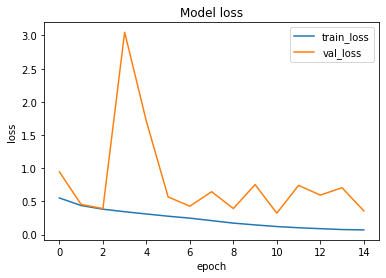

In [ ]:
# plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

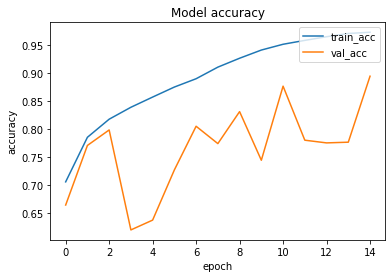

In [ ]:
# plot the training artifacts

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()

In [ ]:
for true,pred in zip(np_test_label_seed2,predict):
    print(true,'-',pred)